In [1]:
import pandas as pd # series datatype
import numpy as np # numpy array datatype

df = pd.read_csv("NY-House-Dataset.csv")

In [2]:
df.head()  #it will display 1st 5 rows of data

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [4]:
df.isna().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

In [5]:
# accepted is value is around 0
df['PRICE'].skew()

66.80000463489985

In [6]:
log_transform = np.log1p(df['PRICE'])
log_transform.skew()

0.8226331868556624

In [7]:
sqrt_transform = np.sqrt(df['PRICE'])
sqrt_transform.skew()

19.086830931803092

In [8]:
from scipy import stats
box_cox_transform, _ = stats.boxcox(df['PRICE']) #numpy array
pd.Series(box_cox_transform).skew()   # now we convert numpy array into panda series

-0.14175545787554825

In [9]:
df['PRICE_Norm'] = pd.Series(box_cox_transform) # storing the transform in new column
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,PRICE_Norm
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,5.530536
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,6.097215
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,5.503369
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,5.291642
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,6.025454


In [10]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,PRICE_Norm
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601,5.660304
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082,0.117330
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033,4.523818
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143,5.592455
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189,5.655246
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638,5.723424
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450,6.199924


In [11]:
#IQR (to find outliers)
Q1 = df['PRICE'].quantile(0.25)
Q3 = df['PRICE'].quantile(0.75)

#buffer
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR


outliers = df[(df['PRICE'] < lower_bound) | (df['PRICE'] > upper_bound)]

In [12]:
len(outliers)

559

In [13]:
#IQR
Q1 = df['PRICE_Norm'].quantile(0.25)
Q3 = df['PRICE_Norm'].quantile(0.75)

#buffer
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR


outliers = df[(df['PRICE_Norm'] < lower_bound) | (df['PRICE_Norm'] > upper_bound)]

In [14]:
len(outliers)

163

In [15]:
outliers.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,PRICE_Norm
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,6.097215
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,5.291642
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,6.025454
7,Brokered by Connie Profaci Realty,House for sale,16800000,8,16.000000,33000.0,177 Benedict Rd,"Staten Island, NY 10304","177 Benedict RdStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Benedict Road,"177 Benedict Rd, Staten Island, NY 10304, USA",40.595002,-74.106424,5.944099
69,Brokered by Sotheby's International Realty - E...,Townhouse for sale,65000000,3,2.373861,15200.0,4 E 79th St,"New York, NY 10075","4 E 79th StNew York, NY 10075",United States,New York,New York County,New York,East 79th Street,"4 E 79th St, New York, NY 10075, USA",40.776561,-73.963317,6.035755


In [16]:
df

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,PRICE_Norm
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,5.530536
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,6.097215
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,5.503369
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,5.291642
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,6.025454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879,5.615836
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152,5.494790
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398,5.705782
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752,5.615652


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [18]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 11
Integer variables: 0
Float variables: 5


In [19]:
numerical_columns = df.select_dtypes(include = ['int64', 'float64'])
corr_mat = numerical_columns.corr()

In [20]:
corr_mat # -1 = 1 | 0 is preffered

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,PRICE_Norm
PRICE,1.000000,0.052189,0.079371,0.110889,-0.020392,-0.054273,0.151595
BEDS,0.052189,1.000000,0.776447,0.420503,-0.060933,-0.004529,0.403869
BATH,0.079371,0.776447,1.000000,0.483935,-0.052235,-0.070892,0.517814
PROPERTYSQFT,0.110889,0.420503,0.483935,1.000000,0.023413,-0.037308,0.406077
LATITUDE,-0.020392,-0.060933,-0.052235,0.023413,1.000000,0.513969,-0.002632
LONGITUDE,-0.054273,-0.004529,-0.070892,-0.037308,0.513969,1.000000,-0.194665
PRICE_Norm,0.151595,0.403869,0.517814,0.406077,-0.002632,-0.194665,1.000000


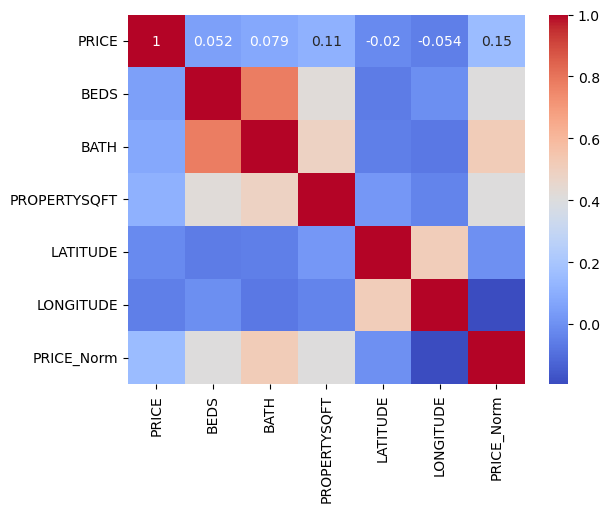

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(corr_mat, annot = True, cmap = 'coolwarm')
plt.show()

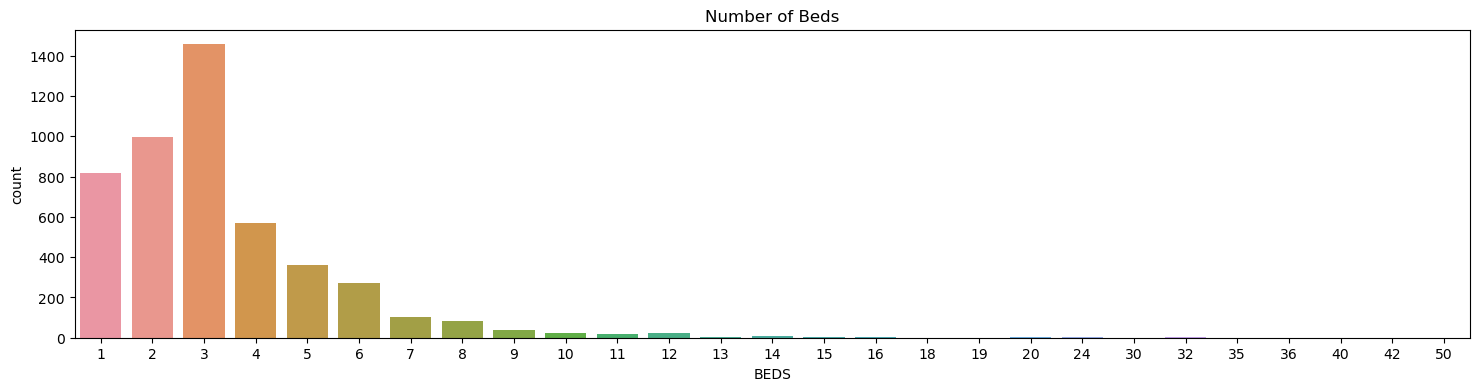

In [22]:
fig, ax = plt.subplots(figsize=(18, 4))
fig = sns.countplot(data=df, x='BEDS', ax=ax)
plt.title('Number of Beds')
plt.show()

In [23]:
# insights about the data
'''
Granularity - (generalization) - decrease
Skewness - decrease

'''

'\nGranularity - (generalization) - decrease\nSkewness - decrease\n\n'

In [24]:
# drop duplicates
df.drop_duplicates(inplace = True)

In [25]:
# remove pattern in strings
df['BROKERTITLE'] = df['BROKERTITLE'].str.replace("Brokered by", "", regex = False)

In [26]:
df

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,PRICE_Norm
0,Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,5.530536
1,Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,6.097215
2,Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,5.503369
3,COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,5.291642
4,Sotheby's International Realty - East Side Ma...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,6.025454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879,5.615836
4797,Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152,5.494790
4798,Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398,5.705782
4799,E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752,5.615652


In [27]:
df['TYPE'] = df['TYPE'].str.replace("for sale", "", regex = False)

In [28]:
df

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,PRICE_Norm
0,Douglas Elliman -111 Fifth Ave,Condo,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,5.530536
1,Serhant,Condo,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,6.097215
2,Sowae Corp,House,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,5.503369
3,COMPASS,Condo,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,5.291642
4,Sotheby's International Realty - East Side Ma...,Townhouse,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,6.025454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,COMPASS,Co-op,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879,5.615836
4797,Mjr Real Estate Llc,Co-op,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152,5.494790
4798,Douglas Elliman - 575 Madison Ave,Co-op,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398,5.705782
4799,E Realty International Corp,Condo,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752,5.615652


In [29]:
# skewness
df['BATH'] = df['BATH']
df['PRICE'] = np.log(df['PRICE'])
df['PROPERTYSQFT'] = np.log(df['PROPERTYSQFT'])

In [30]:
df

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,PRICE_Norm
0,Douglas Elliman -111 Fifth Ave,Condo,12.660328,2,2.000000,7.244228,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,5.530536
1,Serhant,Condo,19.088510,7,10.000000,9.772524,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,6.097215
2,Sowae Corp,House,12.468437,4,2.000000,7.608374,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,5.503369
3,COMPASS,Condo,11.141862,3,1.000000,6.098074,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,5.291642
4,Sotheby's International Realty - East Side Ma...,Townhouse,17.822844,7,2.373861,9.559235,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,6.025454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,COMPASS,Co-op,13.303017,1,1.000000,7.689009,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879,5.615836
4797,Mjr Real Estate Llc,Co-op,12.409013,1,1.000000,7.689009,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152,5.494790
4798,Douglas Elliman - 575 Madison Ave,Co-op,14.058457,1,1.000000,7.689009,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398,5.705782
4799,E Realty International Corp,Condo,13.301555,2,1.000000,6.484635,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752,5.615652


In [31]:
# feature engineering
df['STATE'] = df['STATE'].str.extract('(\d+)$')

In [32]:
df

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,PRICE_Norm
0,Douglas Elliman -111 Fifth Ave,Condo,12.660328,2,2.000000,7.244228,2 E 55th St Unit 803,10022,"2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,5.530536
1,Serhant,Condo,19.088510,7,10.000000,9.772524,Central Park Tower Penthouse-217 W 57th New Yo...,10019,Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,6.097215
2,Sowae Corp,House,12.468437,4,2.000000,7.608374,620 Sinclair Ave,10312,"620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,5.503369
3,COMPASS,Condo,11.141862,3,1.000000,6.098074,2 E 55th St Unit 908W33,10022,"2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,5.291642
4,Sotheby's International Realty - East Side Ma...,Townhouse,17.822844,7,2.373861,9.559235,5 E 64th St,10065,"5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,6.025454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,COMPASS,Co-op,13.303017,1,1.000000,7.689009,222 E 80th St Apt 3A,10075,"222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879,5.615836
4797,Mjr Real Estate Llc,Co-op,12.409013,1,1.000000,7.689009,97-40 62 Dr Unit Lg,11374,"97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152,5.494790
4798,Douglas Elliman - 575 Madison Ave,Co-op,14.058457,1,1.000000,7.689009,427 W 21st St Unit Garden,10011,"427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398,5.705782
4799,E Realty International Corp,Condo,13.301555,2,1.000000,6.484635,91-23 Corona Ave Unit 4G,11373,"91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752,5.615652


In [33]:
frequency = df['TYPE'].value_counts()
frequency

TYPE
Co-op                 1388
House                  966
Condo                  842
Multi-family home      699
Townhouse              288
Pending                229
Contingent              87
Land                    47
For sale                20
Foreclosure             14
Condop                   4
Coming Soon              2
Mobile house             1
Name: count, dtype: int64

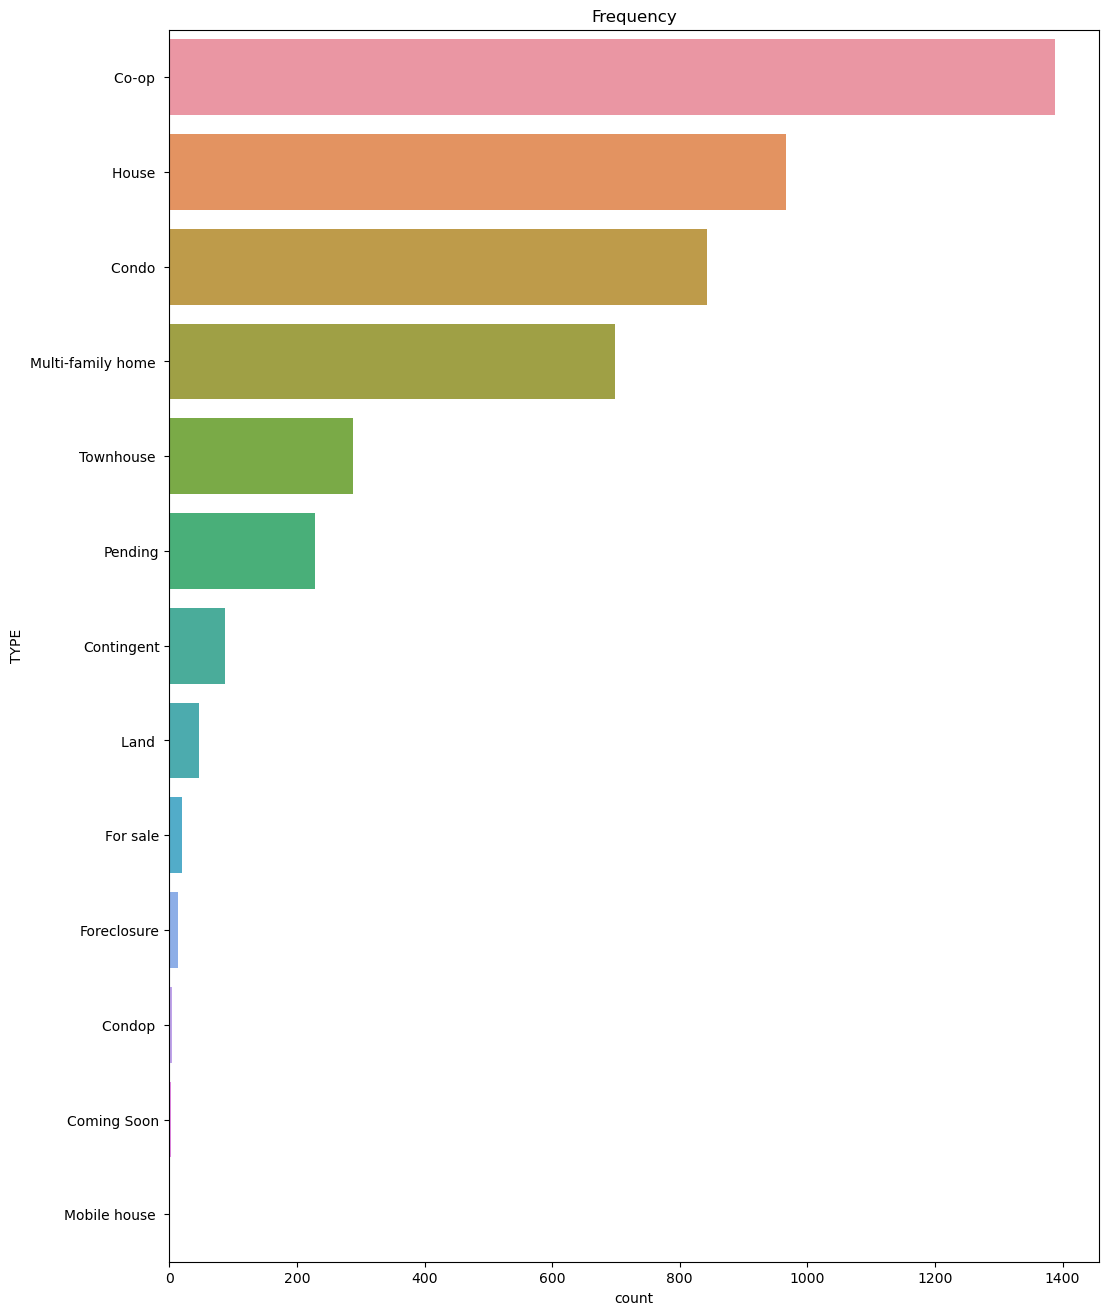

In [34]:
#visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 16))
sns.countplot(y = df['TYPE'], data = df, order = df['TYPE'].value_counts().index)
plt.title("Frequency")
plt.show()

In [35]:
df.LOCALITY.value_counts()

LOCALITY
New York           2395
New York County     930
Queens County       536
Kings County        442
Bronx County        172
Richmond County      58
United States        37
Brooklyn              6
Queens                6
The Bronx             4
Flatbush              1
Name: count, dtype: int64

In [36]:
df.SUBLOCALITY.value_counts()

SUBLOCALITY
New York            967
Kings County        696
Queens County       655
Queens              534
Richmond County     461
Brooklyn            442
Bronx County        291
New York County     271
The Bronx           174
Staten Island        58
Manhattan            21
Flushing              4
Coney Island          3
Riverdale             3
East Bronx            1
Brooklyn Heights      1
Jackson Heights       1
Rego Park             1
Fort Hamilton         1
Dumbo                 1
Snyder Avenue         1
Name: count, dtype: int64

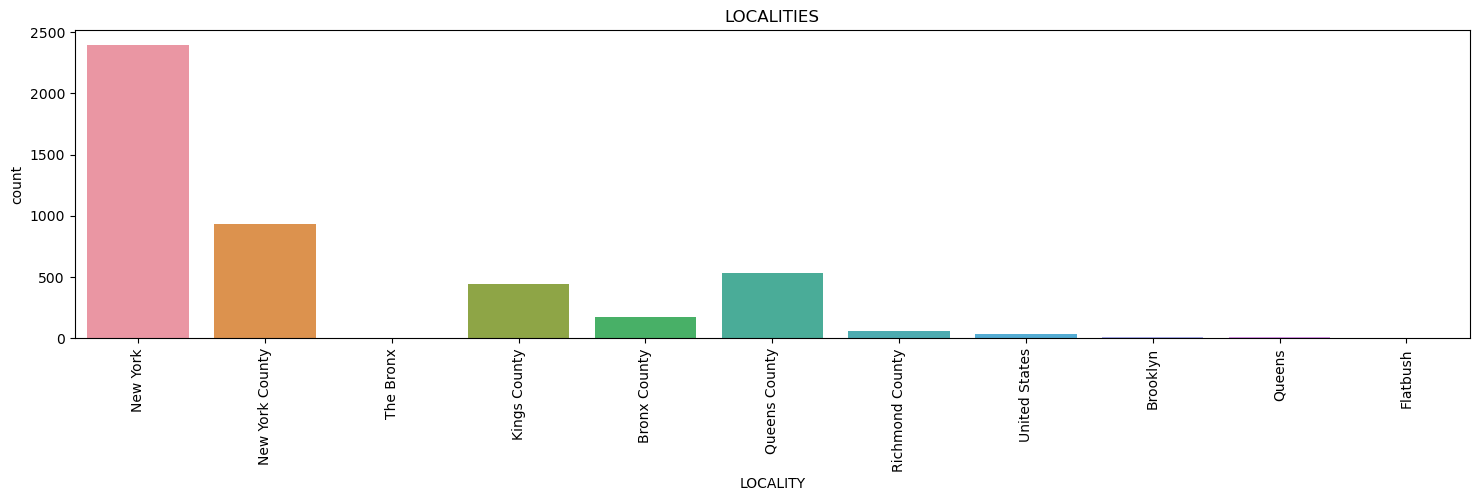

In [37]:
fig, ax = plt.subplots(figsize=(18, 4))
sns.countplot(data=df, x='LOCALITY', ax=ax)  # Remove log scaling
plt.xticks(rotation=90)
plt.title('LOCALITIES')
plt.show()

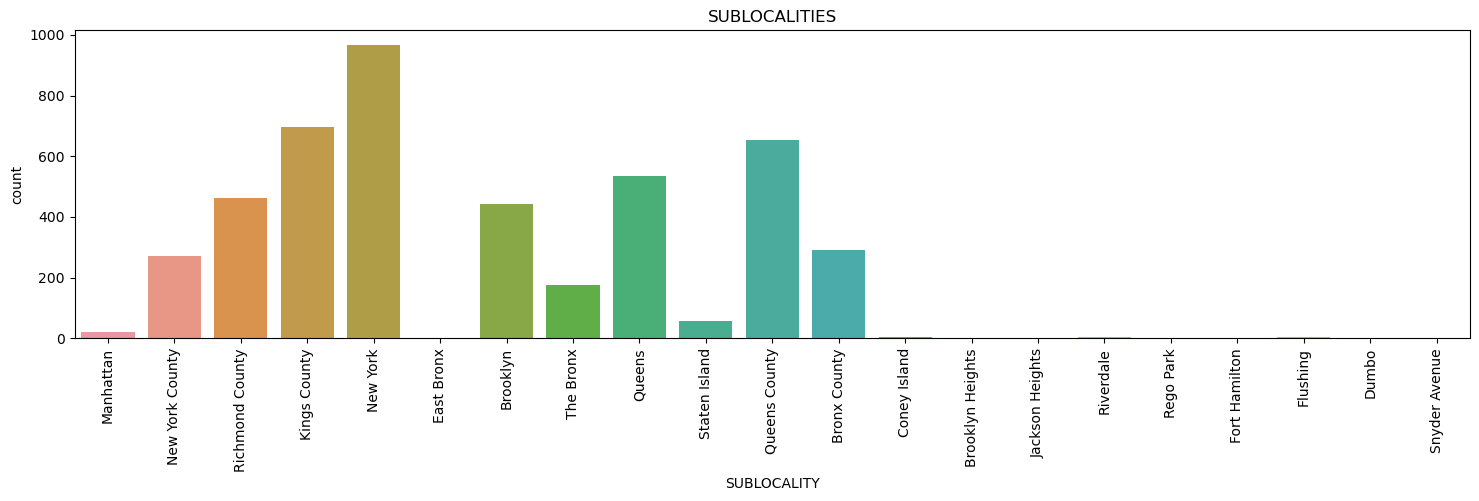

In [38]:
fig, ax = plt.subplots(figsize=(18, 4))
fig = sns.countplot(data=df, x='SUBLOCALITY',ax=ax ) # Changed 'sublocality' to 'SUBLOCALITY'
plt.xticks(rotation=90)
plt.title('SUBLOCALITIES')
plt.show()

In [39]:
# create clusters
geo_df = pd.DataFrame()
geo_df['lat'] = df['LATITUDE']
geo_df['long'] = df['LONGITUDE']

geo_df.head()

,lat,long
0,40.761255,-73.974483
1,40.766393,-73.980991
2,40.541805,-74.196109
3,40.761398,-73.974613
4,40.767224,-73.969856


In [ ]:
# domain knowledge req

def harversine(long1, lat1, long2, lat2):
  long1, lat1, long2, lat2 = map(np.radians, [long1, lat1, long2, lat2])

  dlong = long2 - long1
  dlat = lat2 - lat1

  #skip this
  a = np.sin(dlat/2)**2 + np.cos(lat1) *np.cos(lat2) * np.sin(dlong/2) **2
  c = 2 * np.arcsin(np.sqrt(a))
  r = 6371
  dist = c*r
  #skip this

  return dist

In [41]:
def simple_cluster(houses, radius_km):
  n = houses.shape[0]
  clusters = [-1] * n # initilaization of cluster
  cluster_id = 0

  for i in range(n):
    if clusters[i] == -1:
      for j in range(n):
        if i != j:
          dist = harversine(houses[i][1], houses[i][0], houses[j][1], houses[j][0])
          if dist <= radius_km:
            if clusters[j] == -1:
              clusters[j] = cluster_id
            clusters[i] = clusters[j]

      cluster_id += 1

  return clusters

In [42]:
houses = np.array(geo_df)
radius_km = 15
clusters = simple_cluster(houses, radius_km)

In [43]:
import matplotlib.pyplot as plt

def plot_clusters(houses, clusters):
  plt.figure(figsize = (10, 6))
  n_clusters = len(set(clusters)) # total clusters

  cmap = plt.get_cmap('viridis', n_clusters)
  for cluster_id in range(n_clusters):
    cluster_houses = houses[np.array(clusters) == cluster_id]
    plt.scatter(cluster_houses[:, 1], cluster_houses[:, 0], label = f'Cluster {cluster_id}', c = [cmap(cluster_id)])

  plt.xlabel('Longitude')
  plt.ylabel('Latitude')
  plt.legend()
  plt.show()

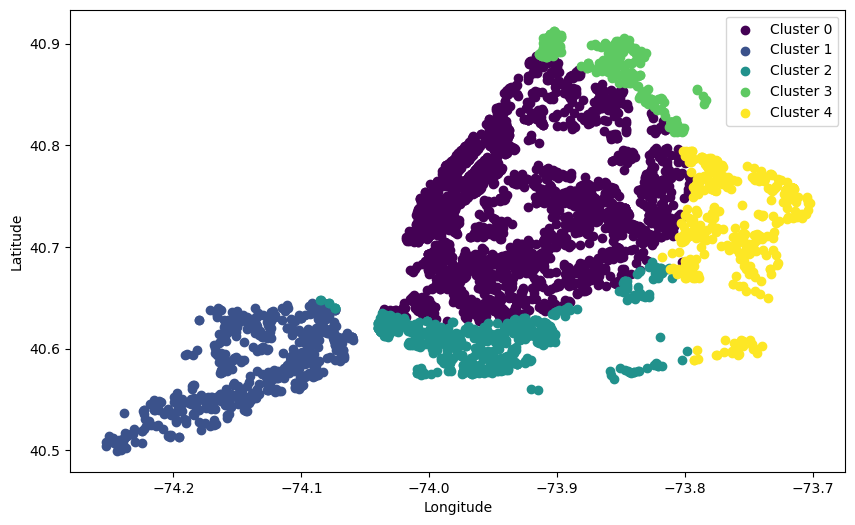

In [44]:
plot_clusters(houses, clusters)

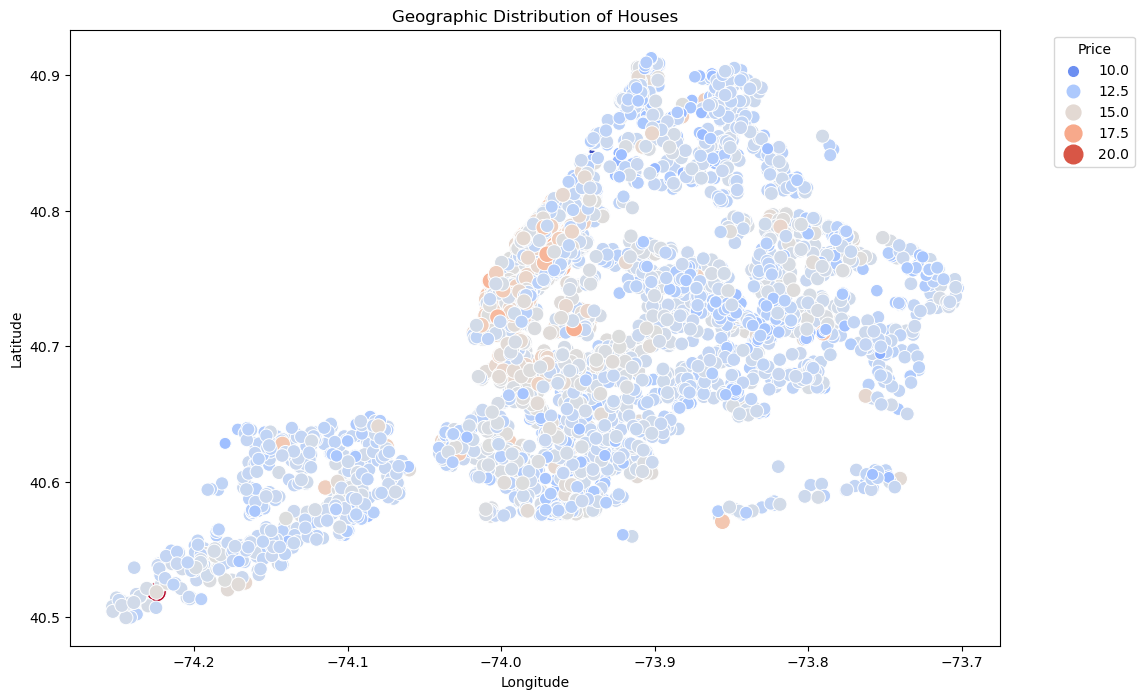

In [45]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=df, hue='PRICE', palette='coolwarm', size='PRICE', sizes=(20, 200))
plt.title('Geographic Distribution of Houses')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [46]:
df['CLUSTER'] = clusters

In [47]:
df

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,PRICE_Norm,CLUSTER
0,Douglas Elliman -111 Fifth Ave,Condo,12.660328,2,2.000000,7.244228,2 E 55th St Unit 803,10022,"2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,5.530536,0
1,Serhant,Condo,19.088510,7,10.000000,9.772524,Central Park Tower Penthouse-217 W 57th New Yo...,10019,Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,6.097215,0
2,Sowae Corp,House,12.468437,4,2.000000,7.608374,620 Sinclair Ave,10312,"620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,5.503369,1
3,COMPASS,Condo,11.141862,3,1.000000,6.098074,2 E 55th St Unit 908W33,10022,"2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,5.291642,0
4,Sotheby's International Realty - East Side Ma...,Townhouse,17.822844,7,2.373861,9.559235,5 E 64th St,10065,"5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,6.025454,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,COMPASS,Co-op,13.303017,1,1.000000,7.689009,222 E 80th St Apt 3A,10075,"222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879,5.615836,0
4797,Mjr Real Estate Llc,Co-op,12.409013,1,1.000000,7.689009,97-40 62 Dr Unit Lg,11374,"97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152,5.494790,0
4798,Douglas Elliman - 575 Madison Ave,Co-op,14.058457,1,1.000000,7.689009,427 W 21st St Unit Garden,10011,"427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398,5.705782,0
4799,E Realty International Corp,Condo,13.301555,2,1.000000,6.484635,91-23 Corona Ave Unit 4G,11373,"91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752,5.615652,0


In [48]:
len(df['BROKERTITLE'].unique())

1036

In [49]:
len(df['TYPE'].unique())

13

In [50]:
# reduce granularity

columns = ['BROKERTITLE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
           'LOCALITY', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE']

df.drop(columns = columns, axis = 1, inplace = True)

In [ ]:
df

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,PRICE_Norm,CLUSTER
0,Condo,12.660328,2,2.000000,7.244228,Manhattan,5.530536,0
1,Condo,19.088510,7,10.000000,9.772524,New York County,6.097215,0
2,House,12.468437,4,2.000000,7.608374,Richmond County,5.503369,1
3,Condo,11.141862,3,1.000000,6.098074,New York County,5.291642,0
4,Townhouse,17.822844,7,2.373861,9.559235,New York County,6.025454,0
...,...,...,...,...,...,...,...,...
4796,Co-op,13.303017,1,1.000000,7.689009,New York,5.615836,0
4797,Co-op,12.409013,1,1.000000,7.689009,Queens County,5.494790,0
4798,Co-op,14.058457,1,1.000000,7.689009,New York County,5.705782,0
4799,Condo,13.301555,2,1.000000,6.484635,Queens,5.615652,0
